# MNIST with sklearn

The goal of this exercise is to 
* explore some of the sklearn functionality for training a MLP classifier (see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)  
* by using cross validation 
* learn how to compute the confusion matrix and its derived quantities and how to interpret them
* explore the test error as a function of the complexity (number of units, number of layers)
* explore the impact of L2 regularisation

__IMPORTANT REMARK__: We here follow the convention of sklearn to enumerate the samples with the first index. 

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Load and prepare the data 

In [34]:
datadir = 'data'

In [35]:
def normalize(x_train,x_test):
    """
    Normalizes the pixels values of the images - mean and stdev are computed from the training set.
    
    Parameters:
    x_train -- Array of training samples of shape (n,m1) where n,m1 are the number of features and samples, respectively.  
    x_test -- Array of test samples of shape (n,m2) where n,m2 are the number of features and samples, respectively. 
    
    Returns:
    The arrays with the normalized train and test samples.  
    """
    mean = np.mean(x_train)
    std = np.std(x_train)
    x_train -= mean
    x_test -= mean
    x_train /= std
    x_test /= std
    return x_train, x_test

In [36]:
# in case you have trouble with the fetch_openml, use this code
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [37]:
x,y = fetch_openml('mnist_784', data_home=datadir, return_X_y=True)
x_train0, x_test0, y_train, y_test = train_test_split(x, y, test_size=10000, random_state=1)
x_train, x_test = normalize(x_train0, x_test0)

## Specify Model Family and learn how to compute the metrics

#### Model
Use the functionality of scikit learn to configure a MLP and its training procedure with
* hidden layers: 0-2 layers with suitable number of units per layer
* mini-batch gradient descent with given batch_size (no advanced optimisers)
* constant learning rate (no learning rate schedules)
* number of epochs
* no regularisation such as L2 penalty or early stopping

#### Metrics
Compute the train and test error resp. accuracy as well as the class precision, recall, f1-score.

__See__:
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## First Training Run

Run the training and plot the training loss with a first set of values:
* no hidden layers
* mini-batchsize: 64
* learning rate: 0.1
* 100 epochs

Compute the Metrics.
Which digits are hard to predict?  

#### MODEL

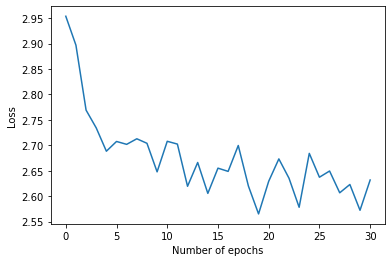

In [38]:
from sklearn.neural_network import MLPClassifier

# Basic Hyperparameters
hidden_layer_sizes = ()
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant
early_stopping = False
n_iter_no_change = 10

### START YOUR CODE ###
# Model instantiation and training

clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    alpha=alpha,
                    batch_size=batch_size,
                    learning_rate='constant',
                    learning_rate_init=learning_rate,
                    max_iter=nepochs,
                    early_stopping=early_stopping,
                    n_iter_no_change=n_iter_no_change,
                    random_state=1
                   )
clf.fit(x_train, y_train)
clf.predict_proba(x_test)

# Plot loss curve

plt.plot(clf.loss_curve_)
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.show()

### END YOUR CODE ###

#### METRICS

In [40]:
### START YOUR CODE ###

# train and test error, accuracy
# per class accuracy, precision, f1 score

from sklearn.metrics import classification_report

ypred_test = clf.predict(x_test)
print(classification_report(y_test, ypred_test))

### END YOUR CODE ###

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       959
           1       0.96      0.94      0.95      1186
           2       0.91      0.89      0.90      1035
           3       0.88      0.86      0.87      1031
           4       0.80      0.95      0.87       941
           5       0.86      0.84      0.85       930
           6       0.92      0.94      0.93       942
           7       0.90      0.92      0.91      1050
           8       0.89      0.82      0.85       936
           9       0.87      0.86      0.86       990

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.90     10000



## Best Model without Hidden Layer

By first varying just the parameters 
* mini-batchsize
* learning rate
* epochs

with adding any hidden layer.

Summarize what the best combination of the abover hyper-parameters is.

In [41]:
### START YOUR CODE ###

# Keep hidden_layer_sizes = () 
# Vary the following

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

param_grid  = dict(
    batch_size = [16, 32, 64],
    learning_rate_init = [0.01, 0.05, 0.1],
    max_iter = [10, 20, 40]
)

cv = StratifiedShuffleSplit(n_splits=3)
grid = GridSearchCV(clf, param_grid=param_grid, cv=cv,n_jobs=-1)
grid.fit(x_train, y_train)

### END YOUR CODE ###

/home/flo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=None, test_size=None,
            train_size=None),
             estimator=MLPClassifier(alpha=0.0, batch_size=64,
                                     hidden_layer_sizes=(),
                                     learning_rate_init=0.1, max_iter=100,
                                     random_state=1),
             n_jobs=-1,
             param_grid={'batch_size': [16, 32, 64],
                         'learning_rate_init': [0.01, 0.05, 0.1],
                         'max_iter': [10, 20, 40]})

In [42]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'batch_size': 64, 'learning_rate_init': 0.01, 'max_iter': 10} with a score of 0.90


__BEST MODEL__ (no hidden layer)

batch_size = 64

learning_rate = 0.01

nepochs = 10

train / validation error : 0.90

## Adding one Hidden layer

Explore the performance of the model by varying the parameters 
* mini-batchsize
* learning rate
* epochs
* complexity (number of units in the one hidden layer)

For given complexity, summarize what the best combination of other hyper-parameters is - compute this for several complexities.

Compute also the "best" train and validation error (or accuracy) for given complexity - as a function of the complexity and plot the curve (for selected number of units - e.g. 10 different values). 


In [62]:
### START YOUR CODE ###

# Keep hidden_layer_sizes = () 
# Vary the following

hidden_layer_sizes = (100,) # just one layer 
batch_size = 64
learning_rate = 0.1
nepochs = 100

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

hidden_layer_sizes = [(50,), (100,), (200,)]

param_grid  = dict(    
    batch_size = [32, 64],
    learning_rate_init = [0.01, 0.1],
    max_iter = [20, 40]
)

best_scores=[]
for hidden_layer_size in hidden_layer_sizes:
    param_grid.update(hidden_layer_sizes = [hidden_layer_size])
    cv = StratifiedShuffleSplit(n_splits=3)
    grid = GridSearchCV(clf, param_grid=param_grid, cv=cv,n_jobs=-1)
    grid.fit(x_train[:1000], y_train[:1000])
    best_scores.append(dict(
        hidden_layer_size = hidden_layer_size,
        params = grid.best_params_,
        error_rate = 1 - grid.best_score_
    ))

### END YOUR CODE ###

/home/flo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/flo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/flo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

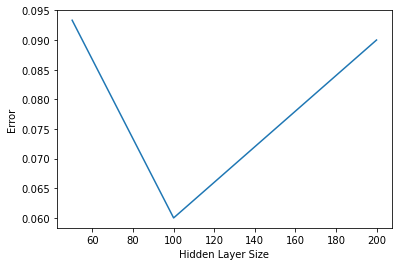

In [85]:
### START YOUR CODE ###
import pandas as pd

best_scores = pd.DataFrame(best_scores)

plt.plot(best_scores['hidden_layer_size'].apply(lambda x: x[0]), best_scores['error_rate'])
plt.xlabel("Hidden Layer Size")
plt.ylabel("Error")
plt.show()

### END YOUR CODE ###

__BEST MODEL__ (one hidden layer)

hidden_layer_sizes = (*,)

batch_size = 

learning_rate = 

nepochs = 

train / validation error :


## Impact of Regularisation

Explore the Impact of Using L2 Regularisation (still adding just one hidden layer) again by varying mini-batchsize, learning rate, epochs, complexity.

Can you reach a better best model performance (on validation set)?

In [3]:
### START YOUR CODE ###

# Vary the following

# Basic Hyperparameters
hidden_layer_sizes = (100,)
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

param_grid  = dict(
    alpha = [0.01, 0.05, 0.1],
    hidden_layer_sizes = [(50,), (100,), (200,)],
    batch_size = [16, 32, 64],
    learning_rate_init = [0.01, 0.05, 0.1],
    max_iter = [10, 20, 40]
)

cv = StratifiedShuffleSplit(n_splits=3)
grid = GridSearchCV(clf, param_grid=param_grid, cv=cv,n_jobs=-1)
grid.fit(x_train, y_train)

### END YOUR CODE ###

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [2]:
### START YOUR CODE ###





### END YOUR CODE ###

__BEST MODEL__ (one hidden layer)

hidden_layer_sizes = (*,)

batch_size = 

learning_rate = 

nepochs = 

alpha =  # L2 regularisation constant

train / validation error :

## Adding up to 3 Hidden Layers

Now consider using a model with more than one hidden layer (at max 3).


In [3]:
### START YOUR CODE ###

# Vary the following

# Basic Hyperparameters
hidden_layer_sizes = (100,0,0)
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant

### END YOUR CODE ###

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [2]:
### START YOUR CODE ###





### END YOUR CODE ###

__BEST MODEL__ (1-3 hidden layers)

hidden_layer_sizes = (*,*,*)

batch_size = 

learning_rate = 

nepochs = 

alpha =  # L2 regularisation constant

train / validation error :

## Test Performance of Best Model

Test Error: 